<a href="https://colab.research.google.com/github/davifebdn/SkLearn_Train_Test/blob/main/Tasca_M5_T02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tasca M5 T02
Exercicis de Train-Test amb ScikitLearn a partir d'un dataset amb informació sobre les vivendes de Houston.

##Exercici 1

Parteix el conjunt de dades adjunt en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.

També adjunt trobaràs una descripció de les diferents variables del dataset.

In [1]:
#Importació
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#Càrrega de les dades
housing = pd.read_csv("/content/drive/MyDrive/IT Academy/Data Science/Sprint 5. Introducció al Test d'Hipòtesis i al Machine Learning/M5T02/housing data.csv", sep=',',encoding="ISO-8859-1")
housing.head()

,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


Descarreguem l'arxiu `housing data description.txt` per veure en què consisteix el dataset i l'enganxem a continuació:

1. Title: Boston Housing Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.
   (c) Date: July 7, 1993

3. Past Usage:
   -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 
       1980.   N.B. Various transformations are used in the table on
       pages 244-261.
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   Concerns housing values in suburbs of Boston.

5. Number of Instances: 506

6. Number of Attributes: 13 continuous attributes (including "class" attribute "MEDV"), 1 binary-valued attribute.

7. Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

8. Missing Attribute Values:  None.

Com que al carregar el dataframe, aquest no té *headers*, les afegeixo amb les dades que hi ha a la descripció del txt:

In [3]:
housing.columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B1000", "LSTAT", "MEDV"]
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B1000,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


Abans de fer la divisió, hem de divir el dataset en *Features* i *Target*. En aquest dataset el *Target* será la columna `MEDV`, és a dir, el preu mitjà de les propietats ocupades per propietaris.

In [4]:
features = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B1000", "LSTAT"]
X = housing.loc[:, features]
y = housing.loc[:, ['MEDV']]

Llavors, hem de fer la divisió del dataset entre en dos sets: Training i Data (train test split). Fem una divisió de 80% pel train i 20% pel test.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .80)

Ara podem fer l'estudi de cada conjunt. Comencem pel X_train:

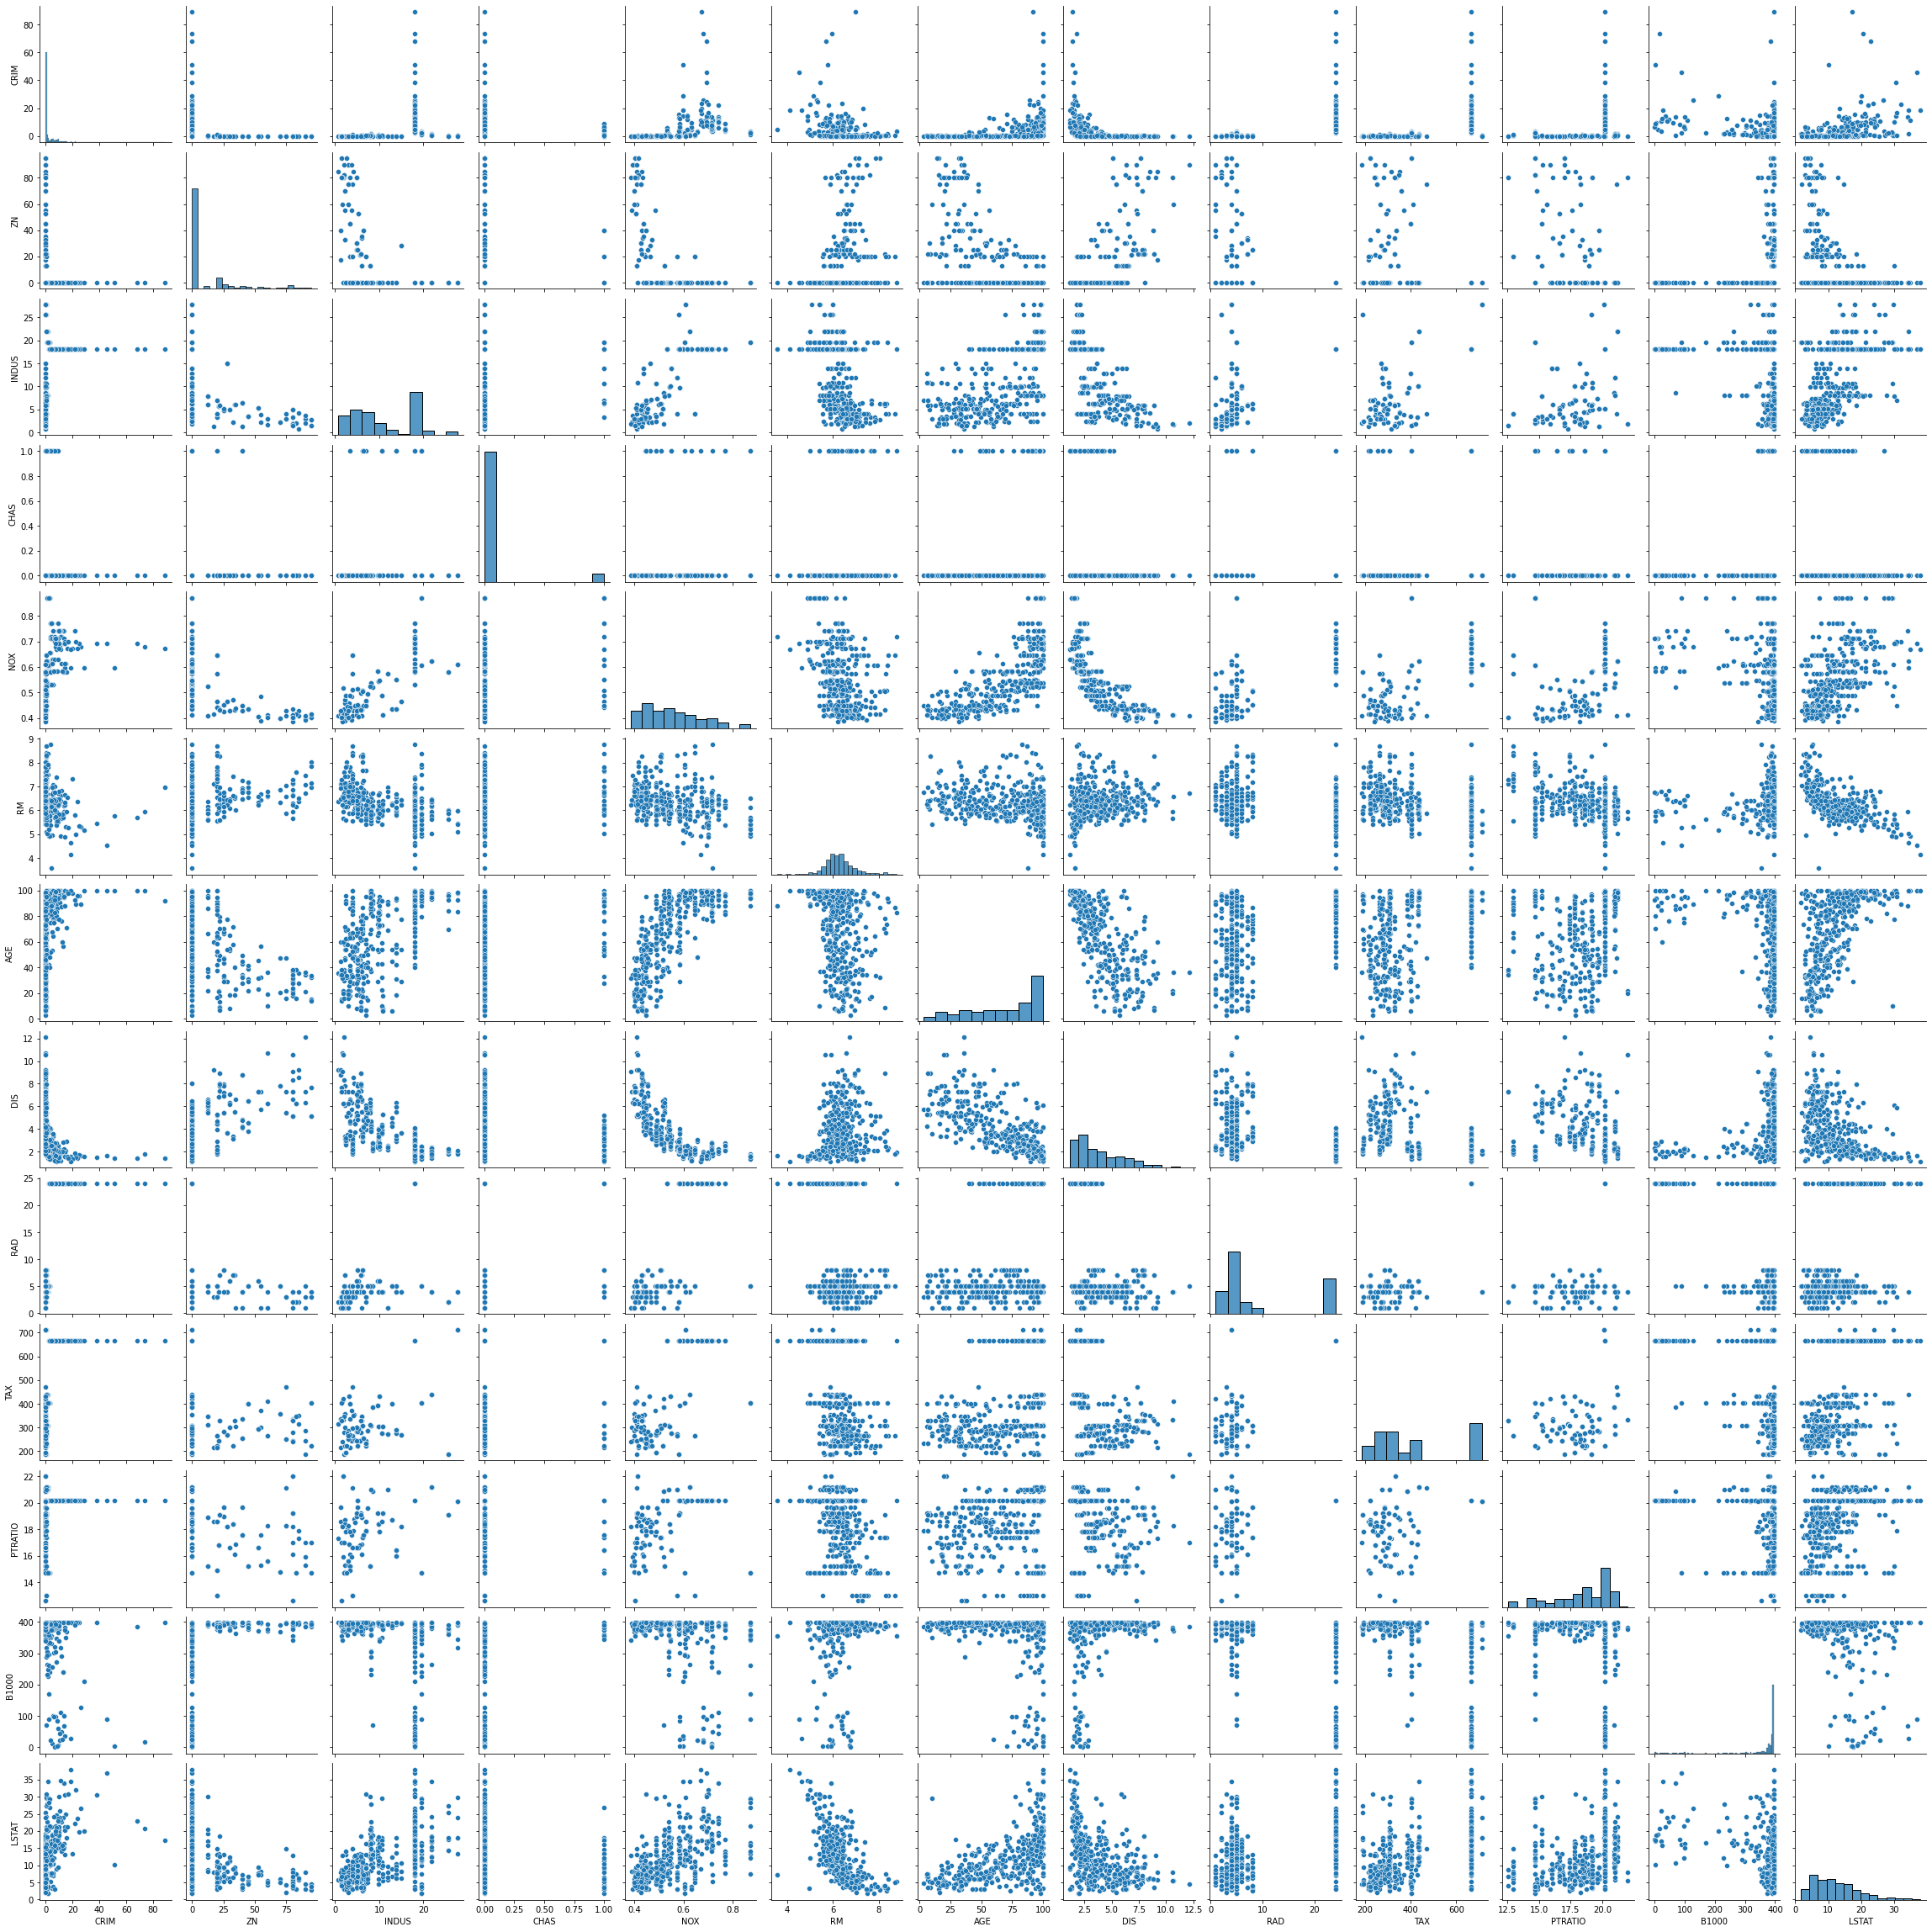

In [6]:
sns.pairplot(X_train)
plt.show()

Mirant les representacions gràfiques del conjunt X_train, podem veure que només RM (Habitacions per habitatge) té una distribució normal, lleugerament bimodal.

En quant a les relacions entre les diferents variables, només algunes presenten una lleugera relació directa (com per exemple entre DIS i NOX, o entre RM i LSTAT).

In [7]:
#Tamany del dataset
X_train.shape

(404, 13)

El 80% del dataset original consta de 404 files i 13 columnes.

In [8]:
#Informació del dataset
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 261 to 172
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  B1000    404 non-null    float64
 12  LSTAT    404 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 60.4 KB


In [9]:
#Quantitat de files buides
X_train.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B1000      0
LSTAT      0
dtype: int64

Les 13 columnes tenen valors numèrics i cap cel·la buida, d'aquestes col·lumnes, 11 tenen valors decimals i 2 valors enters.

In [10]:
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B1000,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.446082,11.392327,11.223515,0.059406,0.554072,6.298295,67.933168,3.833105,9.413366,406.452970,18.473267,359.579158,12.451832
std,8.778372,22.999221,6.911563,0.236676,0.115377,0.680188,28.484000,2.108069,8.649785,168.788061,2.197828,86.862326,7.110180
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.079710,0.000000,5.190000,0.000000,0.448000,5.888750,44.225000,2.110500,4.000000,277.000000,17.400000,376.462500,6.840000
50%,0.243125,0.000000,9.690000,0.000000,0.538000,6.229000,76.850000,3.275900,5.000000,330.000000,19.100000,391.385000,11.110000
75%,3.202962,18.125000,18.100000,0.000000,0.624000,6.620500,94.025000,5.255350,24.000000,666.000000,20.200000,396.352500,16.530000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


Mirant la descripció de les dades, podem veure amb més detall com es comporten les duels columnes amb números enters. La columna CHAS és binaria (0 ó 1), tal com diu al .txt. En canvi, a la columna RAD podem veure que els percentils queden amb valor 5 o per sota, en canvi el valor més gran és 24. És a dir, no és una columna amb una distribució normal. Això últim, ho podem veure millor si mirem tots els valors únics d'aquesta columna:

In [11]:
X_train.RAD.unique()

array([ 5,  4, 24,  6,  7,  3,  8,  2,  1])

A continuació, analitzem algunes de les dades d'aquest subset:

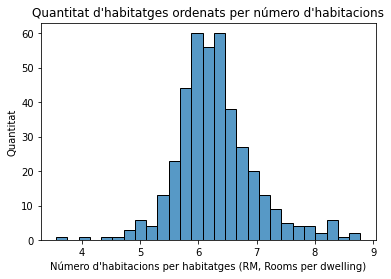

In [12]:
#Distribució de RM
sns.histplot(data=X_train, x="RM")
plt.title("Quantitat d'habitatges ordenats per número d'habitacions")
plt.ylabel('Quantitat')
plt.xlabel("Número d'habitacions per habitatges (RM, Rooms per dwelling)")
plt.show()

A primera vista, a fer l'histograma de RM (Habitacions per habitatge), sembla que té una distribució més o menys normal i bimodal. Ho averigüem fem el test de normalitat de Saphiro-Wilk:

In [13]:
#Shapiro-Wilk Normality Test
from scipy.stats import shapiro
stat, p = shapiro(X_train["RM"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.959, p=0.000
Probably not Gaussian


LLavors, al aplicar el test de normalitat, el resultat surt que no és Gaussià, és a dir, que no té una distribució normal.

A continuació, analitzem una altra relació d'aquest subset. En aquest cas la relació entre DIS (distància ponderada a 5 centres de recerca de feina) i NOX (quantitat de  d'òxid nítric en parts per 10 milions):

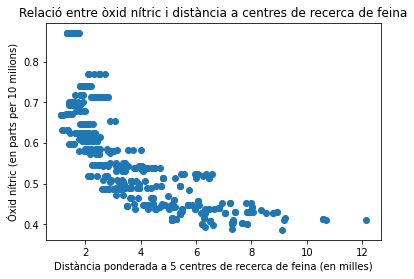

In [14]:
plt.scatter(x=X_train["DIS"], y=X_train["NOX"])
plt.title("Relació entre òxid nítric i distància a centres de recerca de feina")
plt.ylabel('Óxid nítric (en parts per 10 milions)')
plt.xlabel("Distància ponderada a 5 centres de recerca de feina (en milles)")
plt.show()

També podem estudiar la correlació. Com que en aquest cas són dos variables, fem servir el test de Correlació.

In [15]:
#Pearson's Correlation test
from scipy.stats import pearsonr
stat, p = pearsonr(X_train["DIS"], X_train["NOX"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=-0.773, p=0.000
Probably dependent


En aquest cas sí dóna una relació tan visualment com matemàticament. La relació negativa (-0,773) amb un pvalue de 0. El que vol dir és que es pot veure que es detecta menys quantitat d'òxid nítric com a més distància hi hagi als centres de recerca de feina. 

Ara pasem a analitzar l'altra subdivisió del dataset: X_test.

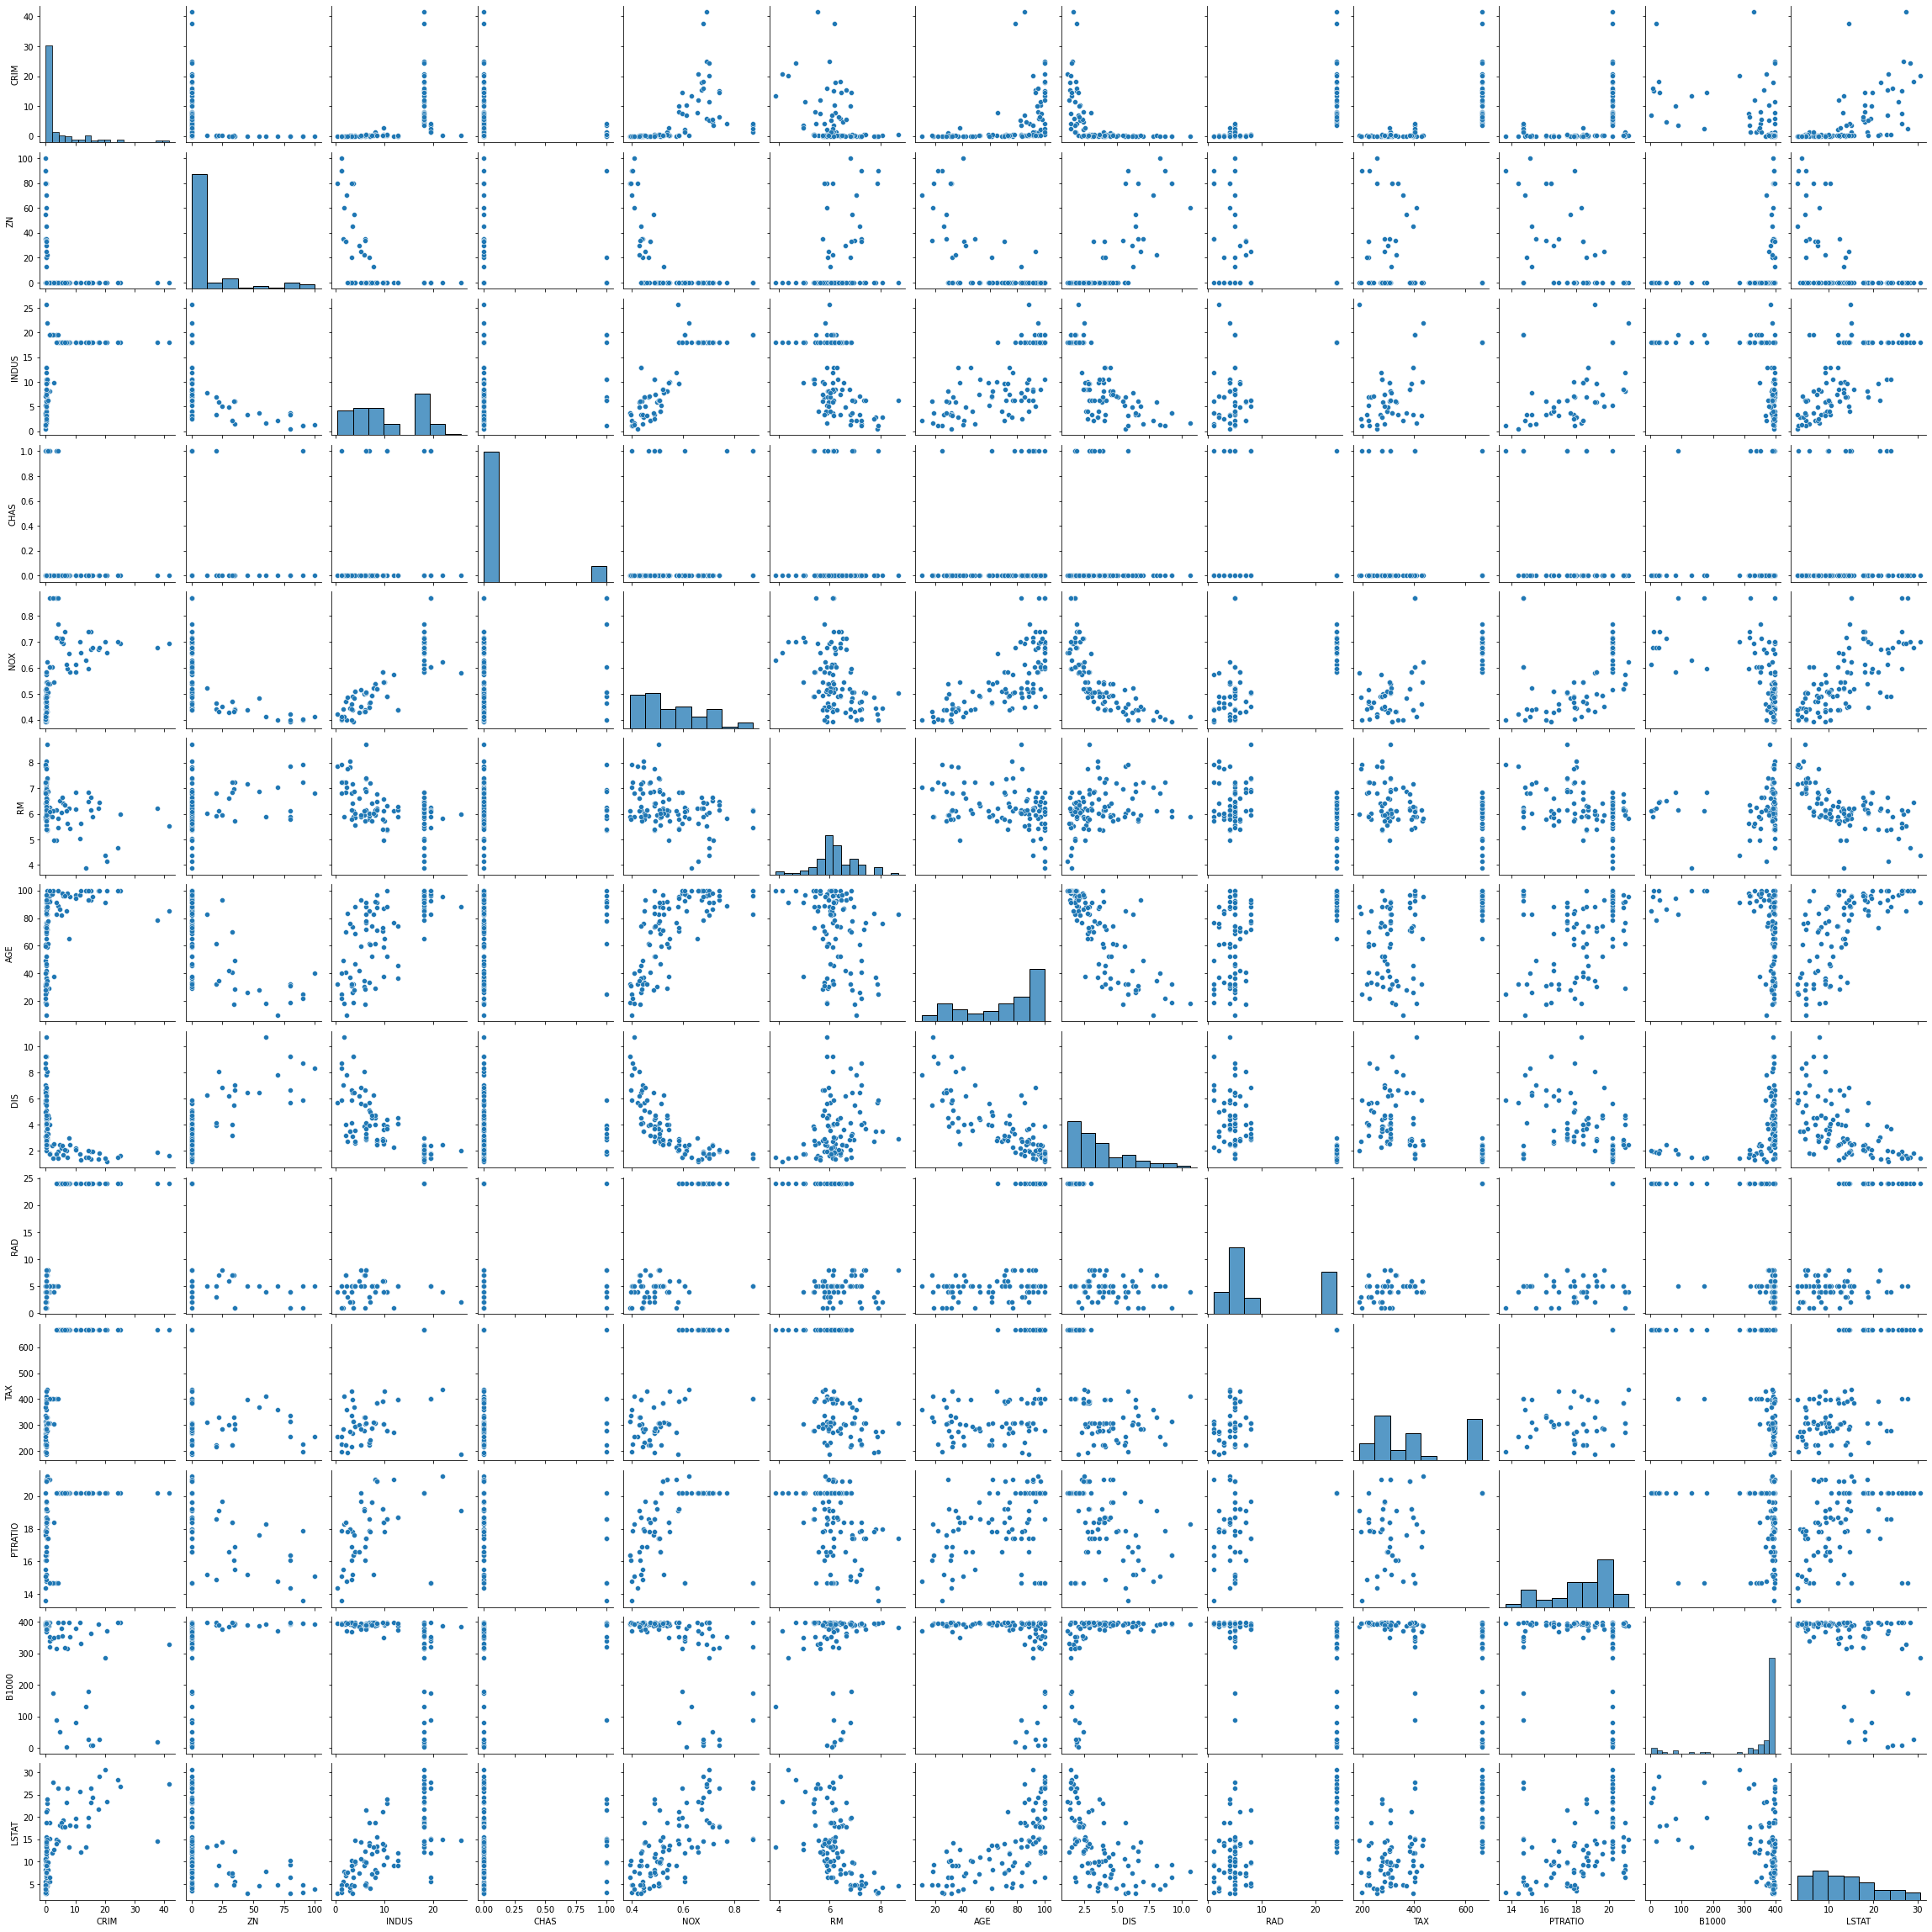

In [16]:
sns.pairplot(X_test)
plt.show()

Aquest subset representa un 20% del total i, com es pot veure al pairplot, la quantitat de punts és inferior a cada gràfica que al X_train.

In [17]:
X_test.shape

(101, 13)

Aquest subset consta de 101 files i les mateixes 13 columnes.

In [18]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 90 to 107
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     101 non-null    float64
 1   ZN       101 non-null    float64
 2   INDUS    101 non-null    float64
 3   CHAS     101 non-null    int64  
 4   NOX      101 non-null    float64
 5   RM       101 non-null    float64
 6   AGE      101 non-null    float64
 7   DIS      101 non-null    float64
 8   RAD      101 non-null    int64  
 9   TAX      101 non-null    float64
 10  PTRATIO  101 non-null    float64
 11  B1000    101 non-null    float64
 12  LSTAT    101 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 15.1 KB


La informació d'aquest subset és exactament igual que l'anterior, menys per la quantitat de files.

##Exercici 2

Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

He consultat la bibliografia de [preprocessament d'informació](https://scikit-learn.org/stable/modules/preprocessing.html) de ScikitLearn. També he fet servir aquest [tutorial](https://www.jcchouinard.com/preprocessing-in-scikit-learn/).

Un procés que podem aplicar és la normalització de les dades. Apliquem la funció `MinMaxScaler()` per transformar totes les dades a que queden entre els valors 0 i 1:

In [22]:
#Importació
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler

#Sel·lecció de columnes numèriques
num_cols = X_train.select_dtypes(include=['int64', 'float64', 'int32']).columns

#Aplicació de MinMaxScaler
minmax = MinMaxScaler()
X_train[num_cols] = minmax.fit_transform(X_train[num_cols])
X_train2 = X_train[num_cols]
X_train2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B1000,LSTAT
261,0.005745,0.210526,0.119630,0.0,0.539095,0.926806,0.912461,0.105384,0.173913,0.146947,0.042553,0.974684,0.115342
71,0.000928,0.000000,0.372963,0.0,0.057613,0.479785,0.050463,0.378079,0.130435,0.225191,0.702128,0.984896,0.104581
479,0.065361,0.000000,0.642963,0.0,0.302469,0.513700,0.636457,0.208659,1.000000,0.914122,0.808511,1.000000,0.248620
6,0.001523,0.131579,0.264074,0.0,0.286008,0.500287,0.959835,0.438387,0.173913,0.236641,0.276596,1.000000,0.480684
416,0.291473,0.000000,0.642963,0.0,0.604938,0.333972,0.887745,0.047095,1.000000,0.914122,0.808511,0.320339,0.687362


In [35]:
#Importació
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold=0, copy=True)
binarizer.fit_transform(X_train2.RM.values.reshape(1, -1))

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 

##Exercici 3

Resumeix les noves columnes generades de manera estadística i gràfica